# Projeto: Classificação
- Henrique de S. Q. dos Santos, NUSP 10819029
- Witor M. A. de Oliveira, NUSP 10692190

Autorizando a leitura de arquivos armazenados no Drive

In [ ]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Importação dos módulos

In [ ]:
import math
import random
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score

## Exercício 1

Leitura do arquivo

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/data/heart.csv', header=(0))

### Pré-processamento dos dados

Remoção das linhas com NaN

In [ ]:
df = df.dropna(axis='rows')

Remoção de linhas duplicadas

In [ ]:
df = df.drop_duplicates()

Removendo valores desconhecidos

In [ ]:
df = df.replace('?', np.nan)
df = df.dropna(axis='rows')

Manipulando os dados

In [ ]:
# Armazena os nomes das classes e os atributos
classes = np.array(pd.unique(df[df.columns[-1]]), dtype=float)
attributes = list(df.columns)

In [ ]:
# Convertendo pra numpy pra melhor manipulação
df = df.to_numpy()

nrow,ncol = df.shape

# Construção das variáveis X e y
y = df[:,-1]
X = df[:,0:ncol-1]

Normalização dos dados


In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Divisão do conjunto em train/test

In [ ]:
# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### 1 - Bayes paramétrico

In [ ]:
# Código retirado de 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula3%20-%20classificador-Bayesiano.ipynb

# Matriz para armazenar as probabilidades
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # fração dos elementos em cada classe

print(classes)

for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = X_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

[1. 0.]


In [ ]:
# Verifica a predição do modelo
y_pred = []
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuráciado modelo
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.7802197802197802


### 2 - Bayes não-paramétrico

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8351648351648352


### 3 - Naive Bayes

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Verificando a predição desse modelo
nb_predicted = gnb.predict(X_test)

print("Acuracia do algoritmo:", accuracy_score(y_test, nb_predicted),"\n")
print("Matriz de confusão:\n",confusion_matrix(y_test,nb_predicted),"\n")
print("Relatório de classificação:\n",classification_report(y_test,nb_predicted))

Acuracia do algoritmo: 0.8461538461538461 

Matriz de confusão:
 [[37  5]
 [ 9 40]] 

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        42
         1.0       0.89      0.82      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



## Exercício 2

Leitura do arquivo

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/data/data/diabetes.csv', header=(0))
df = pd.read_csv('/content/drive/My Drive/data/data/diabetes', header=(0))

### Pré-processamento dos dados

Remoção das linhas com NaN

In [ ]:
df = df.dropna(axis='rows')

Remoção de linhas duplicadas

In [ ]:
df = df.drop_duplicates()

Removendo valores desconhecidos

In [ ]:
df = df.replace('?', np.nan)
df = df.dropna(axis='rows')

In [ ]:
# Armazena os nomes das classes e os atributos
classes = np.array(pd.unique(df[df.columns[-1]]), dtype=float)
attributes = list(df.columns)

Divisão em variáveis X, y

In [ ]:
# Convertendo pra numpy pra melhor manipulação
df = df.to_numpy()

nrow, ncol = df.shape

# Construção das variáveis X e y
y = df[:,-1]
X = df[:,0:ncol-1]

Normalização dos dados

In [ ]:
# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Divisão do conjunto em train/test

In [ ]:
# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Estimando o parâmetro H
O histograma H mostra a relação da classificação com a estimação de H.

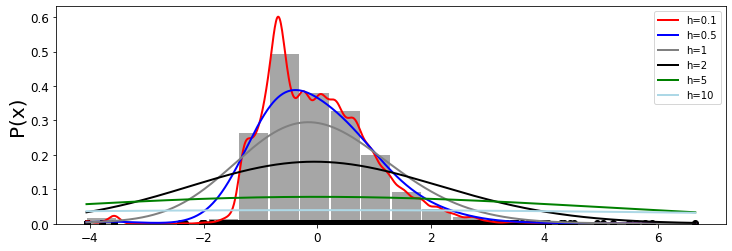

In [ ]:
color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

X = X.reshape((len(X)*8, 1))
nbins = 20

X_plot = np.linspace(np.min(X), np.max(X), 1000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.hist(X, bins = nbins, density = True, color='gray',alpha=0.7, rwidth=0.95)
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
c = 0
vh = [0.1, 0.5, 1, 2, 5, 10]

for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)
plt.show(True)

Como normalizamos os dados do conjunto, é de se esperar que um parâmetro H que torne a função próxima da Normal se adeque melhor aos dados. Por isso, um valor de H próximo à 1 deveria ser o melhor valor.

H = 0.1

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 0.1

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.5627705627705628


H = 0.5

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 0.5

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.658008658008658


H = 1

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 1

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.70995670995671


H = 2

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.7186147186147186


H = 5

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 5

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.7316017316017316


H = 10

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 4

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

In [ ]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

In [ ]:
# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.7272727272727273


## Exercício 3
Geração de dados artificiais

### Ruído = 0.05

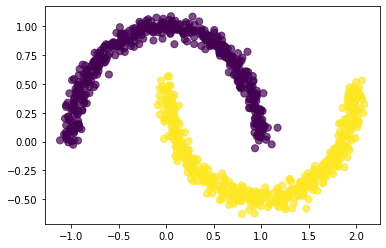

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000

data = datasets.make_moons(n_samples=n_samples, noise=.05)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

# armazena os nomes das classes
classes = np.array(pd.unique(data[1]), dtype=float)  
nrow, ncol = X.shape

Divisão do conjunto em train/test

In [ ]:
# Aplicando normalização nos dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1 - Bayes paramétrico

In [ ]:
# Código retirado de 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula3%20-%20classificador-Bayesiano.ipynb

# Matriz para armazenar as probabilidades
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # fração dos elementos em cada classe

for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = X_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

# Verifica a predição do modelo
y_pred = []
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuráciado modelo
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.8933333333333333


#### 2 - Bayes não-paramétrico

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8766666666666667


#### 3 - Nayve Bayes

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Verificando a predição desse modelo
nb_predicted = gnb.predict(X_test)

print("Acuracia do algoritmo:", accuracy_score(y_test, nb_predicted),"\n")
print("Matriz de confusão:\n",confusion_matrix(y_test,nb_predicted),"\n")
print("Relatório de classificação:\n",classification_report(y_test,nb_predicted))

Acuracia do algoritmo: 0.8933333333333333 

Matriz de confusão:
 [[134  16]
 [ 16 134]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.89      0.89      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### Ruído = 0.5

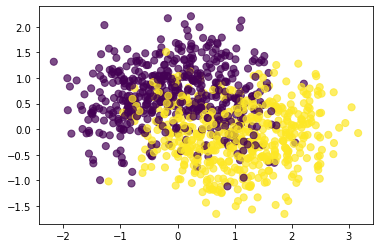

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000

data = datasets.make_moons(n_samples=n_samples, noise=.5)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

# armazena os nomes das classes
classes = np.array(pd.unique(data[1]), dtype=float)  
nrow, ncol = X.shape

Divisão do conjunto em train/test

In [ ]:
# Aplicando normalização nos dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1 - Bayes paramétrico

In [ ]:
# Código retirado de 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula3%20-%20classificador-Bayesiano.ipynb

# Matriz para armazenar as probabilidades
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # fração dos elementos em cada classe

for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = X_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

# Verifica a predição do modelo
y_pred = []
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuráciado modelo
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.8066666666666666


#### 2 - Bayes não-paramétrico

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8133333333333334


#### 3 - Nayve Bayes

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Verificando a predição desse modelo
nb_predicted = gnb.predict(X_test)

print("Acuracia do algoritmo:", accuracy_score(y_test, nb_predicted),"\n")
print("Matriz de confusão:\n",confusion_matrix(y_test,nb_predicted),"\n")
print("Relatório de classificação:\n",classification_report(y_test,nb_predicted))

Acuracia do algoritmo: 0.8066666666666666 

Matriz de confusão:
 [[119  29]
 [ 29 123]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       148
           1       0.81      0.81      0.81       152

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



### Ruído = 1

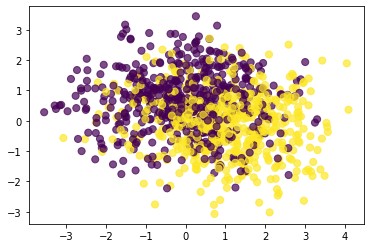

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000

data = datasets.make_moons(n_samples=n_samples, noise=1)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

# armazena os nomes das classes
classes = np.array(pd.unique(data[1]), dtype=float)
nrow, ncol = X.shape

Divisão do conjunto em train/test

In [ ]:
# Aplicando normalização nos dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1 - Bayes paramétrico

In [ ]:
# Código retirado de 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula3%20-%20classificador-Bayesiano.ipynb

# Matriz para armazenar as probabilidades
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # fração dos elementos em cada classe

for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = X_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

# Verifica a predição do modelo
y_pred = []
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuráciado modelo
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.72


#### 2 - Bayes não-paramétrico

In [ ]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2

for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=float)

# Calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.73


#### 3 - Nayve Bayes

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Verificando a predição desse modelo
nb_predicted = gnb.predict(X_test)

print("Acuracia do algoritmo:", accuracy_score(y_test, nb_predicted),"\n")
print("Matriz de confusão:\n",confusion_matrix(y_test,nb_predicted),"\n")
print("Relatório de classificação:\n",classification_report(y_test,nb_predicted))

Acuracia do algoritmo: 0.7266666666666667 

Matriz de confusão:
 [[108  43]
 [ 39 110]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       151
           1       0.72      0.74      0.73       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



### Resultados
Com o **ruído de 0.05**, o Bayes Paramétrico obteve uma acurácia de 0.8833, o Não-Paramétrico uma acurácia de 0.8733 e o Naive Bayes 0.8833. Notamos, com esses resultados, que um baixo ruído não interferiu nos resultados desses classificadores.

Com o **ruído de 0.5**, entretanto, os classificadores mostraram um pouco mais de dificuldade na classificação, de forma que o Bayes Paramétrico, o Não-Paramétrico e o Naive Bayes obtiveram acurácia de 0.8066, 0.8033 e 0.8066, respectivamente.

Por último, notamos que um valor de ruído igual a 1 também afetou os classificadores, mas não impediu que os resultados fossem tão afetados. Em ordem, o classificador Bayes Paramétrico, o Não-Paramétrico e o Naive Bayes obtiveram 0.73, 0.7266 e 0.7333 de acurácia.

Pudemos ver que um valor alto (no intervalo [0,1]) não dificultou muito o trabalho dos classificadores. Apesar de ter reduzido o desempenho deles, uma acurácia de 0.7 é aceitável em muitos casos onde uma alta precisão não é necessária.

## Exercício 4

In [ ]:
# Instalando a biblioteca mlxtend
!pip install mlxtend

Gerando os dados novamente

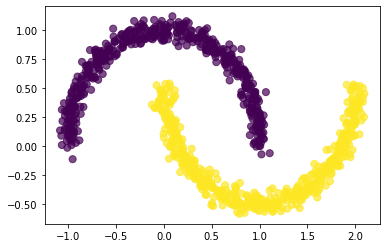

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [ ]:
# Código disponibilizado por 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula6-Classificao-Regressao-logistica.ipynb

# Monta a matriz de atributos
d = np.column_stack((X,np.transpose(y)))

# Converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

### 1 - Naive Bayes

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


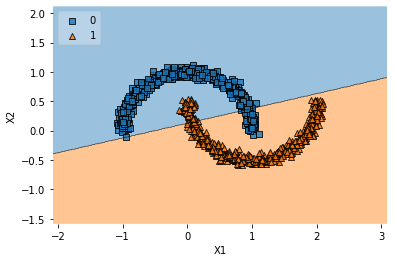

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X, y)

plot_decision_regions(X, y, clf=gnb, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2 - K-vizinhos

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


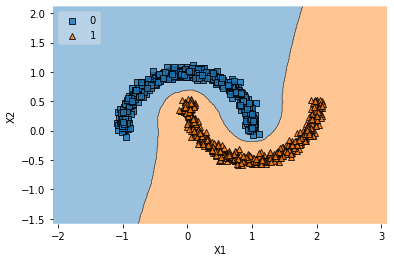

In [ ]:
# We're going to use k = sqrt(n), 'n' num of rows in train set
k = int(round(math.sqrt(len(data)))) # faster than df.shape[0]

# Creating our model
knn = KNeighborsClassifier(n_neighbors=k)

# Training the model using training set
knn.fit(X,y)

# Exibindo regiões de decisão
plot_decision_regions(X, y, clf=knn, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3 - Regressão Logística

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


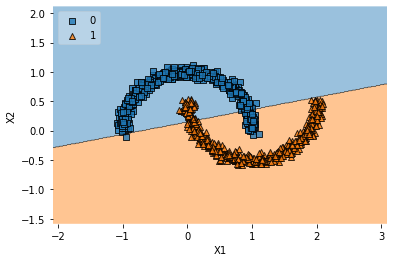

In [ ]:
# Treina o classificador
reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
reg.fit(X, y)

# Exibindo regiões de decisão
plot_decision_regions(X, y, clf=reg, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Exercício 5

Geração dos dados artificiais

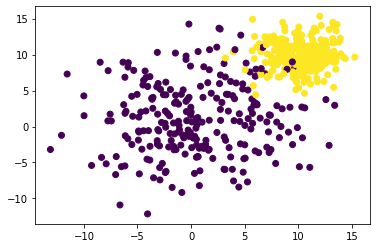

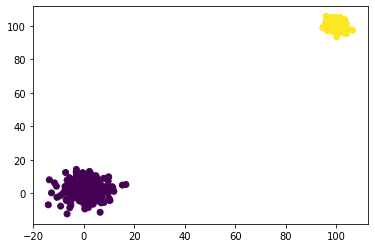

In [ ]:
#gerando o primeiro conjunto 
n = 500
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)

#gerando segundo conjunto, mudando o centro da segunda classe
c = [(1,1), (100,100)] #center of the points
X1, y1 = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X1[:,0],X1[:,1], c=y1)
plt.show(True)

In [ ]:
# armazena os nomes das classes
classes = np.array(pd.unique(y), dtype=float)  

nrow, ncol = X.shape

# armazena os nomes das classes
classes1 = np.array(pd.unique(y1), dtype=float)  

nrow1, ncol1 = X1.shape

Normalização dos dados e Divisão do conjunto em train/test

In [ ]:
# Aplicando normalização nos dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

scaler1 = StandardScaler().fit(X1)
X1 = scaler1.transform(X1)

# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

### 1 - Naive Bayes

In [ ]:
# Criando o modelo e treinando ele
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train)

# Verificando a predição desse modelo
nb_predicted = gnb.predict(X_test)

nb_predicted1 = gnb1.predict(X1_test)

In [ ]:
print("---Resultados do primeiro conjunto---")
print("Acuracia do algoritmo:", accuracy_score(y_test, nb_predicted),"\n")
print("Matriz de confusão:\n",confusion_matrix(y_test, nb_predicted),"\n")
print("Relatório de classificação:\n",classification_report(y_test, nb_predicted))


print("\n---Resultados do segundo conjunto---")
print("Acuracia do algoritmo:", accuracy_score(y1_test, nb_predicted1),"\n")
print("Matriz de confusão:\n",confusion_matrix(y1_test, nb_predicted1),"\n")
print("Relatório de classificação:\n",classification_report(y1_test, nb_predicted1))

---Resultados do primeiro conjunto---
Acuracia do algoritmo: 0.9466666666666667 

Matriz de confusão:
 [[72  4]
 [ 4 70]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        76
           1       0.95      0.95      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


---Resultados do segundo conjunto---
Acuracia do algoritmo: 1.0 

Matriz de confusão:
 [[72  0]
 [ 0 78]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        78

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### 2 - Bayes Paramétrico

In [ ]:
# Código retirado de 
# https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula3%20-%20classificador-Bayesiano.ipynb

# Matriz para armazenar as probabilidades referentes aos dois conjuntos
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
P1 = pd.DataFrame(data=np.zeros((X1_test.shape[0], len(classes1))), columns = classes1) 

Pc = np.zeros(len(classes)) # fração dos elementos em cada classe
Pc1 = np.zeros(len(classes1)) # fração dos elementos em cada classe

for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = X_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))

    elements1 = tuple(np.where(y1_train == classes1[i]))
    Pc1[i] = len(elements1)/len(y1_train)
    Z1 = X1_train[elements1,:][0]
    m1 = np.mean(Z1, axis = 0)
    cv1 = np.cov(np.transpose(Z1))
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

        x1 = X1_test[j,:]
        pj1 = multivariate_normal.pdf(x1, mean=m1, cov=cv1, allow_singular=True)
        P1[classes1[i]][j] = pj1*Pc1[i]

In [ ]:
# Verifica a predição do modelo
y_pred = []
y1_pred = []

for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])

    c1 = np.argmax(np.array(P1.iloc[[i]]))
    y1_pred.append(classes1[c])

y_pred = np.array(y_pred, dtype=float)
y1_pred = np.array(y1_pred, dtype=float)

In [ ]:
# Calcula a acuráciado modelo
print("---Resultados do primeiro conjunto---")
print('Acurácia:', accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n",confusion_matrix(y_test, y_pred),"\n")
print("Relatório de classificação:\n",classification_report(y_test, y_pred))

print("\n---Resultados do segundo conjunto---")
print('Acurácia:', accuracy_score(y1_test, y1_pred))
print("Matriz de confusão:\n",confusion_matrix(y1_test, y1_pred),"\n")
print("Relatório de classificação:\n",classification_report(y1_test, y1_pred))

---Resultados do primeiro conjunto---
Acurácia: 0.9466666666666667
Matriz de confusão:
 [[72  4]
 [ 4 70]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        76
           1       0.95      0.95      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


---Resultados do segundo conjunto---
Acurácia: 0.5866666666666667
Matriz de confusão:
 [[42 30]
 [32 46]] 

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58        72
           1       0.61      0.59      0.60        78

    accuracy                           0.59       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.59      0.59      0.59       150



### Resultados
Aqui foi possível observar que para o primeiro conjunto gerado com a distância entre os centros das classes de 12.73, a acurácia dos dois classificadores foram bem parecidas e altas quase atingindo 99% nos dois. Entretanto, para o segundo conjunto gerado com distância entre os centros de aproximadamente 140, ou seja, com uma maior diferenciação o que deveria facilitar o trabalho dos classificadores, o esperado acabou por se concretizar apenas no classificador Nayve-Bayes, visto que sua acurácia subiu para 100%, mas no Bayes-paramétrico ocorreu o contrário a acurácia do classficador diminuiu bastante ficando na casa dos 50%.

## Exercício 6

### Classificação com ruído de 0.05

 Gerando dois conjuntos de pontos em duas dimensões

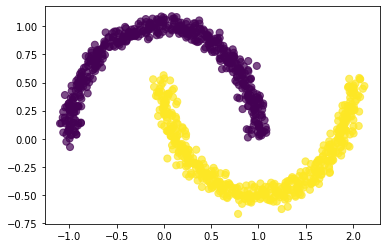

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000

# Gerando dados artificiais
data = datasets.make_moons(n_samples=n_samples, noise=.05)

# Separando os dados
X = data[0]
y = data[1]

# Dividindo conjunto em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plotando o gráfico dos dados
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

#### 1 - Naive Bayes


In [ ]:
# Criando e ajustando o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predição
predicted = gnb.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.8533333333333334
[[123  23]
 [ 21 133]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       146
           1       0.85      0.86      0.86       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



#### 2 - K-Vizinhos

In [ ]:
k_range = list(range(1,100))

weight_options = ["uniform", "distance"]
metric_options = ["euclidean", "manhattan"]

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_options)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

1.0
[[146   0]
 [  0 154]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



#### 3 - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treina o classificador
reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

reg.fit(X_train, y_train)

# Predict
predicted = reg.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.8566666666666667
[[124  22]
 [ 21 133]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       146
           1       0.86      0.86      0.86       154

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



### Classificação com ruído de 0.5

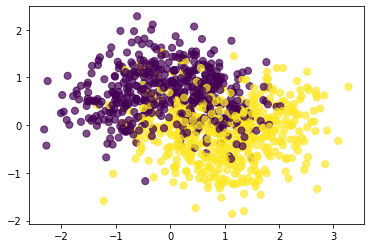

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6,4))
n_samples = 1000

# Gerando dados artificiais
data = datasets.make_moons(n_samples=n_samples, noise=.5)

# Separando os dados
X = data[0]
y = data[1]

# Dividindo conjunto em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plotando o gráfico dos dados
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

#### 1 - Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Criando e ajustando o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predição
predicted = gnb.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.8333333333333334
[[129  24]
 [ 26 121]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       153
           1       0.83      0.82      0.83       147

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



#### 2 - K-Vizinhos

In [ ]:
k_range = list(range(1,100))

weight_options = ["uniform", "distance"]
metric_options = ["euclidean", "manhattan"]

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_options)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.832857142857143
{'metric': 'euclidean', 'n_neighbors': 31, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

0.84
[[130  23]
 [ 25 122]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       153
           1       0.84      0.83      0.84       147

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



#### 3 - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treina o classificador
reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

reg.fit(X, y)

# Predict
predicted = reg.predict(X)

print(accuracy_score(y, predicted))
print(confusion_matrix(y,predicted))
print(classification_report(y,predicted))

0.817
[[408  92]
 [ 91 409]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       500
           1       0.82      0.82      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



### Classificação com ruído de 1.0

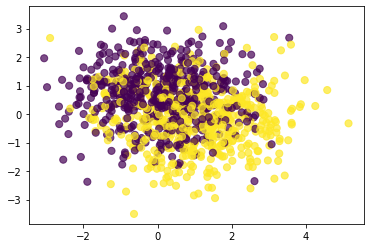

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6,4))
n_samples = 1000

# Gerando dados artificiais
data = datasets.make_moons(n_samples=n_samples, noise=1)

# Separando os dados
X = data[0]
y = data[1]

# Dividindo conjunto em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plotando o gráfico dos dados
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

#### 1 - Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Criando e ajustando o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predição
predicted = gnb.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.72
[[115  34]
 [ 50 101]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       149
           1       0.75      0.67      0.71       151

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



#### 2 - K-Vizinhos

In [ ]:
k_range = list(range(1,100))

weight_options = ["uniform", "distance"]
metric_options = ["euclidean", "manhattan"]

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_options)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6971428571428572
{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

0.7133333333333334
[[123  26]
 [ 60  91]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       149
           1       0.78      0.60      0.68       151

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.73      0.71      0.71       300



#### 3 - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treina o classificador
reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

reg.fit(X, y)

# Predict
predicted = reg.predict(X)

print(accuracy_score(y, predicted))
print(confusion_matrix(y,predicted))
print(classification_report(y,predicted))

0.707
[[354 146]
 [147 353]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       500
           1       0.71      0.71      0.71       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



### Resultados

Primeiro, apresentamos um sumário geral dos resultados obtidos no momento da escrita dessa célula:

#### Com ruído de 0.05
* Naive Bayes:

        Acurácia: 0.8566

* K-Vizinhos (grid):

        K = 1
        Métrica: euclidean
        Pesos: uniform
        Acurácia: 1.0

* K-Vizinhos (modelo):
        Acurácia: 1.0

* Regressão:
        Acurácia: 0.866

#### Com ruído de 0.5
* Naive Bayes:

        Acurácia: 0.7933

* K-Vizinhos (grid):

        K = 43
        Métrica: manhattan
        Pesos: uniform
        Acurácia: 0.8530

* K-Vizinhos (modelo):
        Acurácia: 0.8433

* Regressão:
        Acurácia: 0.808

#### Com ruído de 1.0
* Naive Bayes:

        Acurácia: 0.6866

* K-Vizinhos (grid):

        K = 88
        Métrica: euclidean
        Pesos: uniform
        Acurácia: 0.708

* K-Vizinhos (modelo):
        Acurácia: 0.67

* Regressão:
        Acurácia: 0.701

### Conclusões
Com um **ruído muito baixo (0.05)**, a melhor classificação que obtivemos foi utilizando o K-NN, que nos retornou uma acurácia de 1.0. Um fato interessante é que qualquer valor que utilizávamos para a quantidade de vizinhos_próximos (n_neighbors) continuava retornando uma predição 100% precisa. 
O cenário não mudou quando aumentamos o **ruído nos dados para 0.5**. O K-NN continuou sendo o modelo com melhor predição, porém, com uma perda de 20% em sua acurácia. Vale ressaltar que, até aqui, o modelo com menos variação em sua predição foi o Regressão.
Por fim, ao aumentarmos o ruído para o máximo permitido pelo professor (1.0), tanto o Naive bayes, quanto o K-Vizinhos apresentaram resultados ruins, o primeiro com uma acurácia de 0.6866 e o segundo com 0.67. O modelo de Regressão Logística, apesar de também muito afetado pelo ruído, conseguiu obter uma acurácia de 0.701, se estabilizando como o modelo com menor variação na acurácia nessas 3 execuções.

## Exercício 7


Geração dos dados artificiais

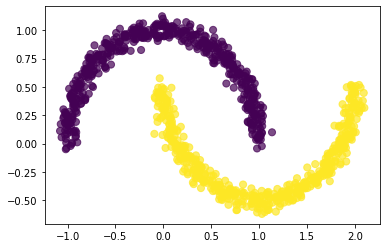

In [ ]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Normalização dos dados


In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Divisão do conjunto em train/test

In [ ]:
# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### 1 - Árvore de decisão

In [ ]:
max_depth_range = list(range(1, 5))
min_samples_split_range = list(range(2, 5))
criterion_options = ["gini", "entropy"]
splitter_options = ["best", "random"]
min_samples_leaf_range = list(range(1, 5))
min_weight_fraction_leaf_range = list(np.arange(0, 0.5, 0.1))
max_leaf_nodes_range = list(range(2,5))

# Se estimar esses aqui, demora muito
# ccp_alpha_range = list(np.arange(1, 5, 0.1))
# min_impurity_decrease_range = list(np.arange(1,5, 0.1))
# max_features_options = [np.arange(1,5, 0.1), "auto", "sqrt", "log2"]

param_grid = dict(
                max_depth = max_depth_range, 
                  min_samples_split = min_samples_split_range,
                  criterion = criterion_options,
                  splitter = splitter_options,
                  min_samples_leaf = min_samples_leaf_range,
                  min_weight_fraction_leaf = min_weight_fraction_leaf_range,
                  max_leaf_nodes = max_leaf_nodes_range,
                )

grid = GridSearchCV(DecisionTreeClassifier(), 
                    param_grid, 
                    cv = 10, 
                    scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9285714285714286
{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.8933333333333333
0.9036090157640363
0.9858156028368794
0.8967741935483872


### 2 - Florestas Aleatórias

In [ ]:
depth_range = list(range(1,100))

param_grid = dict(max_depth = depth_range)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9957142857142858
{'max_depth': 15}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9966666666666667
0.9970414201183432
1.0
0.9970326409495549


### 3 - Bagging

In [ ]:
n_estimators_range = list(range(1,10))
max_samples_range = list(range(1,10))
max_features_range = list(range(1,2))
bootstrap_options = [True, False]
bootstrap_features_options = [True, False]
oob_score_options = [True, False]
warm_start_options = [True, False]

param_grid = dict(
    n_estimators = n_estimators_range,
    max_samples = max_samples_range,
    max_features = max_features_range,
    bootstrap = bootstrap_options,
    bootstrap_features = bootstrap_features_options,
    )

grid = GridSearchCV(BaggingClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9342857142857144
{'bootstrap': False, 'bootstrap_features': False, 'max_features': 1, 'max_samples': 8, 'n_estimators': 9}
BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=1, max_samples=8,
                  n_estimators=9, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9366666666666666
0.9352048421337911
0.9411764705882353
0.943952802359882


### Resultados
Na última execução desse notebook, em questões de acurácia, o classificador Florestas de Aleatórias foi o que melhor desempenhou, acertando quase 100% dos testes. Em seguida, a Árvore de decisão e, por último, o *Bagging*.

## Exercício 8

Leitura dos arquivos

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/data/data/Vehicle.csv', header=(0))
# df = pd.read_csv('/content/drive/My Drive/data/data/vertebralcolumn-3C.csv', header=(0))
df = pd.read_csv('/content/drive/My Drive/data/data/winequality-red.csv', header=(0))

Pré-processamento dos dados

Remoção das linhas com NaN

In [ ]:
df = df.dropna(axis='rows')

Remoção de linhas duplicadas

In [ ]:
df = df.drop_duplicates()

Removendo valores desconhecidos

In [ ]:
df = df.replace('?', np.nan)
df = df.dropna(axis='rows')

Manipulando os dados

In [ ]:
# Armazena os nomes das classes e os atributos
classes = np.array(pd.unique(df[df.columns[-1]]), dtype=str)
attributes = list(df.columns)

In [ ]:
# Convertendo pra numpy pra melhor manipulação
df = df.to_numpy()

nrow,ncol = df.shape

# Construção das variáveis X e y
y = df[:,-1]
X = df[:,0:ncol-1]

Normalização dos dados


In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Divisão do conjunto em train/test

In [ ]:
# Dividindo nosso conjunto em treino (70% do conjunto) e teste (30% do conjunto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### 1 - Naive Bayes


In [ ]:
# Criando e ajustando o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predição
predicted = gnb.predict(X_test)

print(accuracy_score(y_test, predicted))
print("\n")

#####
# Source for this peace of code:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

predicted_proba = gnb.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("\n")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

#####

print("\n")
print(precision_score(y_test, predicted, average='macro'))
print("\n")
print(f1_score(y_test, predicted, average='macro'))

0.5367647058823529


One-vs-One ROC AUC scores:
0.716228 (macro),
0.731752 (weighted by prevalence)


One-vs-Rest ROC AUC scores:
0.710670 (macro),
0.733456 (weighted by prevalence)


0.2959912011790366


0.3081100847592478


#### 2 - K-Vizinhos

In [ ]:
k_range = list(range(1,100))

weight_options = ["uniform", "distance"]
metric_options = ["euclidean", "manhattan"]

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_options)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.5919627192982455
{'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='distance')


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))

#####
# Source for this peace of code:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

predicted_proba = grid.best_estimator_.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("\n")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

#####

print("\n")
print(precision_score(y_test, predicted, average='macro'))
print("\n")
print(f1_score(y_test, predicted, average='macro'))

0.6299019607843137
One-vs-One ROC AUC scores:
0.706643 (macro),
0.729009 (weighted by prevalence)


One-vs-Rest ROC AUC scores:
0.744397 (macro),
0.764321 (weighted by prevalence)


0.3440400501443488


0.30430930135552536


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3 - Regressão Logística

In [ ]:
# Treina o classificador
reg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

reg.fit(X_train, y_train)

# Predict
predicted = reg.predict(X_test)

print(accuracy_score(y_test, predicted))

#####
# Source for this peace of code:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

predicted_proba = reg.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("\n")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

#####

print("\n")
print(precision_score(y_test, predicted, average='macro'))
print("\n")
print(f1_score(y_test, predicted, average='macro'))

0.6053921568627451
One-vs-One ROC AUC scores:
0.811312 (macro),
0.803428 (weighted by prevalence)


One-vs-Rest ROC AUC scores:
0.832835 (macro),
0.776034 (weighted by prevalence)


0.29394505737424886


0.2906720743030995


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4 - Florestas Aleatórias

In [ ]:
depth_range = list(range(1,100))

param_grid = dict(max_depth = depth_range)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.6046052631578946
{'max_depth': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# clf = RandomForestClassifier(max_depth=2)
# clf.fit(X, y)

# # Predict
# predicted = clf.predict(X)

# print(accuracy_score(y, predicted))
# print(confusion_matrix(y,predicted))
# print(classification_report(y,predicted))

# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))

#####
# Source for this peace of code:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

predicted_proba = grid.best_estimator_.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, predicted_proba, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, predicted_proba, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("\n")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

#####

print("\n")
print(precision_score(y_test, predicted, average='macro'))
print("\n")
print(f1_score(y_test, predicted, average='macro'))

0.6225490196078431
One-vs-One ROC AUC scores:
0.772122 (macro),
0.770494 (weighted by prevalence)


One-vs-Rest ROC AUC scores:
0.793026 (macro),
0.775980 (weighted by prevalence)


0.31997199038588914


0.3025122790428913


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Resultados
Abaixo, segue a imagem dos resultados das métricas das classificações dos três conjuntos de dados:

![](https://i.imgur.com/FkOPm9O.png)

Como podemos ver, o último conjunto de dados, o *Winequality-red*, foi o conjunto onde os clasificadores obtiveram as piores métricas.

## Exercício 9

Counter({0: 9900, 1: 100})


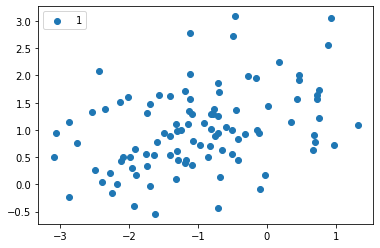

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import sklearn.metrics as metrics
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


# Normalizando os dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
# Definindo o modelo
gnb = GaussianNB()

metricas = ["roc_auc", "precision", "f1", "accuracy"]

dicNEstradificados = {}
dicEstradificados = {}

for i in metricas:
  # usando k-fold cross validation não estradificado com k = 5
  # o método cross_val_score retorna um vetor com k valores referentes apenas a uma métrica passada no argumento scoring
  resultadosNEstradificados = cross_val_score(gnb, X, y, cv=KFold(n_splits=5), scoring=i)
  # guarda médias das métricas calculadas para cada um dos k folds criados
  dicNEstradificados[i] = np.mean(resultadosNEstradificados)
  
  # usando k-fold cross validation estradificado com k = 5
  resultadosEstradificados = cross_val_score(gnb, X, y, cv=StratifiedKFold(n_splits=5), scoring=i) 
  dicEstradificados[i] = np.mean(resultadosEstradificados)

In [ ]:
print("-----Resultados da validação cruzada não estradificada-----")
print("AUC: ",  dicNEstradificados.get("roc_auc") )
print("Precisão: ", dicNEstradificados.get("precision"))
print("Medida F1: ", dicNEstradificados.get("f1"))
print("Acurácia: ", dicNEstradificados.get("accuracy"))

print("\n-----Resultados da validação cruzada estradificada-----")
print("AUC: ",  dicEstradificados.get("roc_auc") )
print("Precisão: ", dicEstradificados.get("precision"))
print("Medida F1: ", dicEstradificados.get("f1"))
print("Acurácia: ", dicEstradificados.get("accuracy"))

-----Resultados da validação cruzada não estradificada-----
AUC:  0.9311156313718645
Precisão:  0.38982456140350874
Medida F1:  0.2911194019203607
Acurácia:  0.9884999999999999

-----Resultados da validação cruzada estradificada-----
AUC:  0.9290252525252527
Precisão:  0.38982456140350874
Medida F1:  0.2914892004547177
Acurácia:  0.9884999999999999


### Resultados
Comparando as métricas calculadas utilizando o classificador de Nayves-Bayes junto com o método de cross-validation estradificado e não estradificado com k = 5, foi possível observar que o desbalancemento dos dados causa valores mais altos de verdadeiros positivos (acerta muitas instâncias da classe majoritária já que tem mais informação sobre ela) e de falsos positivos(erra muitas instâncias da classe minoritária já que tem menos informação sobre ela) o que implica em uma acurácia e área abaixo da curva ROC maiores, entretanto também diminuindo a precisão do modelo e consequentemente o valor da medida F1.

Com realação a utilização do método cross-validation estradificado ou não, foi observada pouca diferença entre os dois, apenas um pequeno aumento na acurácia do método não estradificado.

## Exercício 10


In [ ]:
train = pd.read_csv('/content/drive/My Drive/data/data/titanic/train.csv', header=(0))
test = pd.read_csv('/content/drive/My Drive/data/data/titanic/test.csv', header=(0))

df = pd.concat([train,test], sort=True).reset_index(drop=True)

df.drop_duplicates()

df.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


Verificando quantos valores nulos nós temos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Tratando valores desconhecidos

In [ ]:
df['Age'] = df.Age.fillna(df.Age.median())
df = df.drop(columns=['Cabin', 'Ticket'])
df = df.dropna(axis='rows')
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# df['Child'] = (df.Age < 16).astype(int)
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# df = df.dropna(axis='rows')

In [ ]:
df.head(2)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0


Convertendo valores categóricos para numéricos

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Encoding our df to turn categorical columns into numerical ones
categorical_feature_mask = df.dtypes==object # categorical boolean mask
categorical_cols = df.columns[categorical_feature_mask].tolist() # filter categorical columns using mask and turn it into a list

le = preprocessing.LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) # convert categorical columns to numerical columns

In [ ]:
df.head(2)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,108,0,1,3,1,1,0.0
1,38.0,0,71.2833,190,0,2,1,0,1,1.0


In [ ]:
# Convertendo pra numpy pra melhor manipulação
df = df.to_numpy()

nrow,ncol = df.shape

# Construção das variáveis X e y
y = df[:,-1]
X = df[:,0:ncol-1]

Normalização dos dados


In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Divisão do conjunto em train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Treinando modelos

In [ ]:
# Creating our model
knn = KNeighborsClassifier()

# Training the model using training set
knn.fit(X_train, y_train)

# Predict
predicted = knn.predict(X_test)

knn_score = round(accuracy_score(y_test, predicted) * 100,2)

In [ ]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

predicted = gaussian.predict(X_test)

gaussian_score = round(accuracy_score(y_test, predicted) * 100,2)

In [ ]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

predicted = decision_tree.predict(X_test)

decisionTree_score = round(accuracy_score(y_test, predicted) * 100,2)

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

predicted = logreg.predict(X_test)

logreg_score = round(accuracy_score(y_test, predicted) * 100,2)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

predicted = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

randomForest_score = round(accuracy_score(y_test, predicted) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 
              'Random Forest'],
    'Score': [knn_score, gaussian_score, 
              decisionTree_score, logreg_score, randomForest_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
79.78,Logistic Regression
79.03,KNN
79.03,Random Forest
78.28,Naive Bayes
73.78,Decision Tree


Como o modelo de Regresão Logística foi o melhor, iremos estimar os parâmetros dele para melhorar a acurácia dos resultados

In [ ]:
penalty_options = ['l2', 'none']
dual_options = [False]
random_state_range = list(range(1, 50))
solver_options = ['newton-cg', 'lbfgs', 'sag', 'saga']
warm_start_options = [True, False]

param_grid = dict(
                penalty = penalty_options,
                dual = dual_options,
                random_state = random_state_range,
                solver = solver_options,
                warm_start = warm_start_options,
                )

grid = GridSearchCV(LogisticRegression(), 
                    param_grid, 
                    cv = 10, 
                    scoring = 'accuracy')

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7910138248847927
{'dual': False, 'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg', 'warm_start': True}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=True)


In [ ]:
# Treinando o modelo
grid.best_estimator_.fit(X_train,y_train)

# Predicão
predicted = grid.best_estimator_.predict(X_test)

print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.797752808988764
0.7881736526946107
0.7211538461538461
0.7352941176470588
